In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Correct file path
file_path = "C:/Users/Vedha Pranava/Desktop/ml_1/cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Encode the class labels
label_encoder = LabelEncoder()
data['cyberbullying_type'] = label_encoder.fit_transform(data['cyberbullying_type'])

# Filter to include only two classes
filtered_data = data[data['cyberbullying_type'].isin([0, 1])]

# Convert tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)
features = tfidf.fit_transform(filtered_data['tweet_text']).toarray()

# Separate the features by class
class_0_data = features[filtered_data['cyberbullying_type'] == 0]
class_1_data = features[filtered_data['cyberbullying_type'] == 1]

# Calculate the mean (centroid) for each class
centroid_0 = np.mean(class_0_data, axis=0)
centroid_1 = np.mean(class_1_data, axis=0)

# Calculate the spread (standard deviation) for each class
spread_0 = np.std(class_0_data, axis=0)
spread_1 = np.std(class_1_data, axis=0)

# Calculate the distance between the centroids of the two classes
distance_between_centroids = np.linalg.norm(centroid_0 - centroid_1)

print(f"Centroid of class 0: {centroid_0}")
print(f"Centroid of class 1: {centroid_1}")
print(f"Spread of class 0: {spread_0}")
print(f"Spread of class 1: {spread_1}")
print(f"Distance between class centroids: {distance_between_centroids}")


Centroid of class 0: [2.29445448e-02 5.14110596e-03 8.92939099e-03 5.11052588e-03
 3.71774582e-03 3.10853685e-02 8.94975494e-03 9.20131979e-03
 7.35175378e-03 1.42967909e-02 1.43565488e-02 8.11628639e-02
 2.87627753e-03 5.13226272e-03 4.46919243e-03 3.15180170e-03
 3.30332025e-02 4.47294696e-03 1.75514820e-02 2.38351902e-03
 3.26861014e-03 3.02050560e-02 1.27948394e-02 7.17411917e-03
 6.59530658e-03 2.65916729e-02 3.97210708e-03 2.03391798e-02
 1.04265346e-02 4.64586884e-03 2.62576547e-02 5.26238129e-03
 5.25449028e-03 5.04092492e-03 4.14387654e-03 4.74836484e-03
 5.13058826e-03 7.14430792e-03 8.09514902e-02 4.76984028e-02
 6.82095333e-02 1.07883063e-02 2.85267852e-02 2.36148399e-02
 3.89631665e-03 4.96164699e-03 2.54541821e-03 1.66839370e-02
 4.49861281e-03 5.77494376e-03 5.82499717e-05 3.65700642e-03
 4.13762664e-03 6.06476416e-03 8.30630190e-03 1.01844957e-02
 1.07969510e-02 8.89633772e-04 1.25906126e-02 3.97166692e-03
 3.88918360e-03 4.11915625e-03 1.39212599e-02 2.47879838e-03
 5.

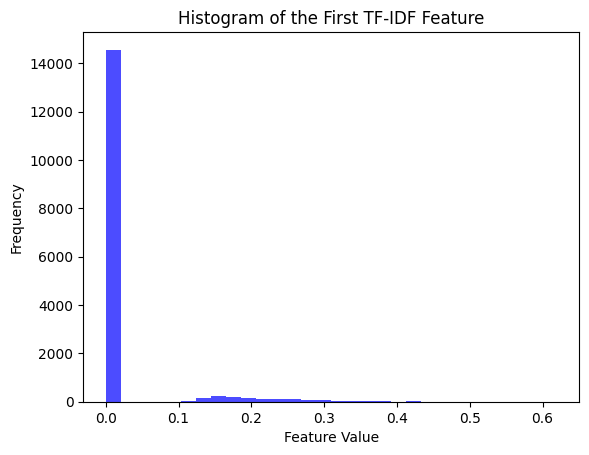

Mean of the feature: 0.01872207744293231
Variance of the feature: 0.004159891383082458


In [4]:
import matplotlib.pyplot as plt

# Select a feature (e.g., first feature in the TF-IDF vector)
feature = features[:, 0]

# Plot the histogram
plt.hist(feature, bins=30, color='blue', alpha=0.7)
plt.title("Histogram of the First TF-IDF Feature")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.show()

# Calculate mean and variance
mean_feature = np.mean(feature)
variance_feature = np.var(feature)

print(f"Mean of the feature: {mean_feature}")
print(f"Variance of the feature: {variance_feature}")


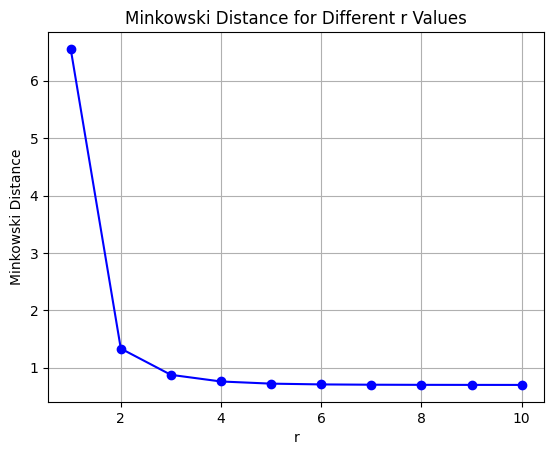

In [5]:
from scipy.spatial.distance import minkowski

# Select two feature vectors
vector_1 = features[0]
vector_2 = features[1]

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = []

for r in r_values:
    distance = minkowski(vector_1, vector_2, p=r)
    distances.append(distance)

# Plot the distances
plt.plot(r_values, distances, marker='o', color='b')
plt.title("Minkowski Distance for Different r Values")
plt.xlabel("r")
plt.ylabel("Minkowski Distance")
plt.grid(True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, filtered_data['cyberbullying_type'], test_size=0.3, random_state=42)

# Output the sizes of the train and test sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 11167 samples
Test set size: 4786 samples
